In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Villagers.csv')
df = df.loc[:,['Name','Species','Gender','Personality','Hobby','Birthday']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         397 non-null    object
 1   Species      397 non-null    object
 2   Gender       397 non-null    object
 3   Personality  397 non-null    object
 4   Hobby        397 non-null    object
 5   Birthday     397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


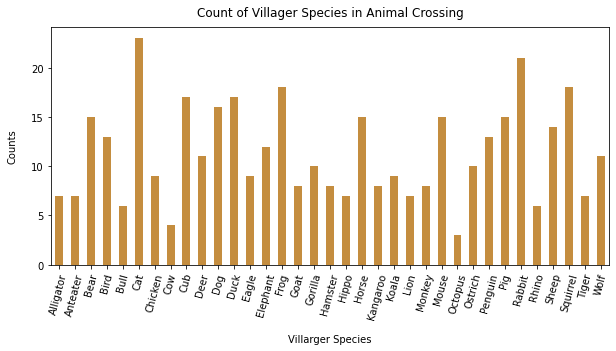

In [40]:
Species_ct = df['Species'].value_counts().sort_index()
Species_ct.plot(kind = 'bar', figsize = (10,5), color = '#c48d3f')
plt.gcf().subplots_adjust(bottom=0.22)
plt.xlabel("Villarger Species", labelpad=14)
plt.xticks(rotation = 75)
plt.ylabel("Counts", labelpad=14)
plt.title("Count of Villager Species in Animal Crossing", y=1.02)

plt.gcf().subplots_adjust(bottom=0.22)
plt.savefig('CountofVillagerSpecies.png', facecolor='w', edgecolor='w')
pass

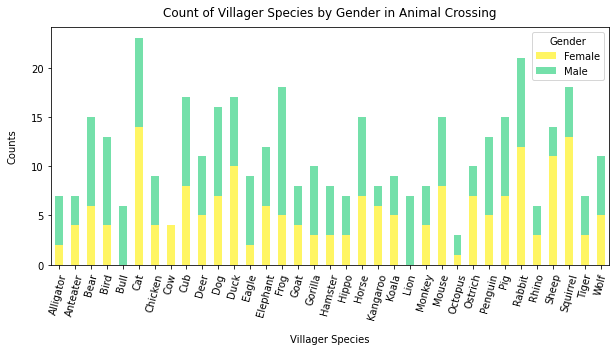

In [42]:
Species_by = df.groupby('Species')['Gender'].value_counts().unstack().fillna(0)
Species_by.plot(kind = 'bar', stacked = True, figsize = (10,5), color = ['#fff563','#74e0aa'])

# df.Species.value_counts().plot(kind = 'bar')
plt.xlabel("Villager Species", labelpad=14)
plt.xticks(rotation = 75)
plt.ylabel("Counts", labelpad=14)
plt.title("Count of Villager Species by Gender in Animal Crossing", y=1.02)

plt.gcf().subplots_adjust(bottom=0.22)
plt.savefig('CountofVillagerSpeciesbyGender.png', facecolor='w', edgecolor='w')
pass


### Villager Personality

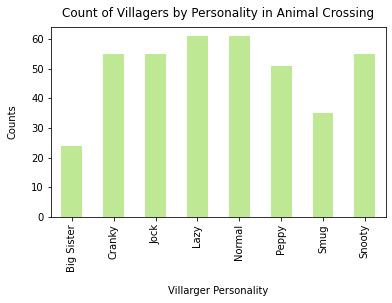

In [43]:
Species_by = df['Personality'].value_counts().sort_index()
Species_by.plot(kind = 'bar', color = '#bee893')
plt.xlabel("Villarger Personality", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Count of Villagers by Personality in Animal Crossing", y=1.02)
plt.gcf().subplots_adjust(bottom=0.22)
plt.savefig('CountofVillagerPersonality.png', facecolor='w', edgecolor='w')
pass

In [110]:
pd.DataFrame(df2.VillagerSource.value_counts().rename_axis('Recipe Source').reset_index(name = 'Recipe Count'))

pd.DataFrame(df['Personality'].value_counts().rename_axis('Villager Personality').reset_index(name = 'Villager Count'))

,Villager Personality,Villager Count
0,Normal,61
1,Lazy,61
2,Cranky,55
3,Snooty,55
4,Jock,55
5,Peppy,51
6,Smug,35
7,Big Sister,24


### Villager Birthday

In [15]:
bd = df.Birthday.str.split('/', expand = True)
bd.columns = ['Month','Day']
bd.Month = bd.Month.astype(int)

import calendar
from sort_dataframeby_monthorweek import *

bd['Mon'] = bd['Month'].apply(lambda x: calendar.month_abbr[x])
bd.head(3)
bd_by = pd.DataFrame(bd.Mon.value_counts())

bd_by = bd_by.reset_index()
bd_by.columns = ['Month','Counts']

df_sort = Sort_Dataframeby_Month(df=bd_by,monthcolumnname='Month')
dfbd = df_sort.set_index('Month')

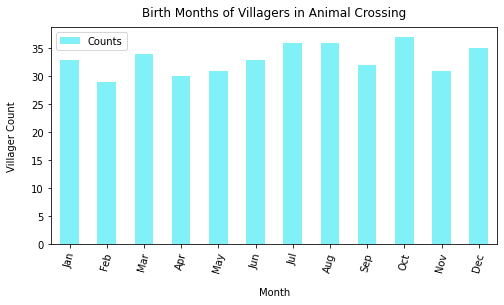

In [98]:
dfbd.plot(kind = 'bar', figsize = (8,4), color = '#81f1f7')

# df.Species.value_counts().plot(kind = 'bar')
plt.xlabel("Month", labelpad=14)
plt.xticks(rotation = 75)
plt.ylabel("Villager Count", labelpad=14)
plt.title("Birth Months of Villagers in Animal Crossing", y=1.02)

pass

### Load Recipe Data

In [54]:
df2 = pd.read_csv('Recipes.csv')
df2 = df2.loc[:,['Name','Category','Buy','Sell','Source']]
df2.Source.value_counts()

Balloons                          77
All villagers                     48
Celeste                           47
Smug villagers                    32
Jock villagers                    32
Snooty villagers                  30
Lazy villagers                    30
Normal villagers                  30
Cranky villagers                  29
Big Sister villagers              29
Nook Miles Redemption             29
Peppy villagers                   29
Pascal                            15
Egg bottle; Egg balloon           15
Snowboy                           15
All villagers; Balloons           10
Fishing                            8
Balloons; Isabelle                 8
All villagers; Tom Nook            8
Cozy Turkey Day DIY                8
Tom Nook                           6
Peppy villagers; Tom Nook          6
Wildest Dreams DIY                 6
DIY for Beginners                  6
Pretty Good Tools Recipes          6
Test Your DIY Skills               6
Cranky villagers; Tom Nook         6
B

In [108]:
df2 = df2[df2['Source'].str.contains('villagers')]
df2[['VillagerSource','other']] = df2['Source'].str.split(' ',1, expand= True)
df2.loc[(df2['VillagerSource'] == 'Big'), 'VillagerSource'] = 'Big Sister'
print(df2.groupby(['Category']).Name.count())

pd.DataFrame(df2.VillagerSource.value_counts().rename_axis('Recipe Source').reset_index(name = 'Recipe Count'))


Category
Equipment         59
Floors             9
Housewares       148
Miscellaneous     40
Other              3
Rugs               7
Wall-mounted      50
Wallpaper         25
Name: Name, dtype: int64


,Recipe Source,Recipe Count
0,All,67
1,Peppy,35
2,Cranky,35
3,Lazy,35
4,Smug,34
5,Normal,34
6,Big Sister,34
7,Jock,34
8,Snooty,33


### Load Item Data

In [56]:
dfhouse = pd.read_csv('Housewares.csv')
dfwall = pd.read_csv('Wall-mounted.csv')
dfmisc = pd.read_csv('Miscellaneous.csv')
dftool = pd.read_csv('Tools.csv')
dfdress = pd.read_csv('Dress-up.csv')
dfhead = pd.read_csv('Headwear.csv')
dfpaper = pd.read_csv('Wallpaper.csv')

In [57]:
dfall = dfhouse.append(dfmisc, ignore_index = True)
dfall = dfall.append(dfwall, ignore_index = True)
dfall = dfall.append(dftool, ignore_index = True)
dfall = dfall.append(dfhead, ignore_index = True)
dfall = dfall.append(dfdress, ignore_index = True)
dfall = dfall.append(dfpaper, ignore_index = True)
dfall.shape

(7596, 70)

In [58]:
dfall = dfall.loc[:,['Name','Buy','Sell', 'Tag']]
# dfall = dfall.drop_duplicates()
dfall.shape

(7596, 4)

In [59]:
#Merge recipe and items
dfnew = dfall.merge(df2, how = 'inner',on = 'Name')
dfnew.Sell_x = dfnew.Sell_x.astype(int)
dfnew.head()

,Name,Buy_x,Sell_x,Tag,Category,Buy_y,Sell_y,Source,VillagerSource,other
0,acoustic guitar,NFS,3210,Musical Instrument,Housewares,NFS,200.0,Smug villagers,Smug,villagers
1,acoustic guitar,NFS,3210,Musical Instrument,Housewares,NFS,200.0,Smug villagers,Smug,villagers
2,acoustic guitar,NFS,3210,Musical Instrument,Housewares,NFS,200.0,Smug villagers,Smug,villagers
3,acoustic guitar,NFS,3210,Musical Instrument,Housewares,NFS,200.0,Smug villagers,Smug,villagers
4,acoustic guitar,NFS,3210,Musical Instrument,Housewares,NFS,200.0,Smug villagers,Smug,villagers


In [60]:
dfnew[(dfnew.VillagerSource == 'Smug') & (dfnew.Category == 'Equipment')]

,Name,Buy_x,Sell_x,Tag,Category,Buy_y,Sell_y,Source,VillagerSource,other
1234,gold helmet,NFS,50000,NaN,Equipment,NFS,200.0,Smug villagers,Smug,villagers
1251,straw umbrella hat,NFS,200,NaN,Equipment,NFS,200.0,Smug villagers,Smug,villagers
1256,gold armor,NFS,80000,NaN,Equipment,NFS,200.0,Smug villagers,Smug,villagers


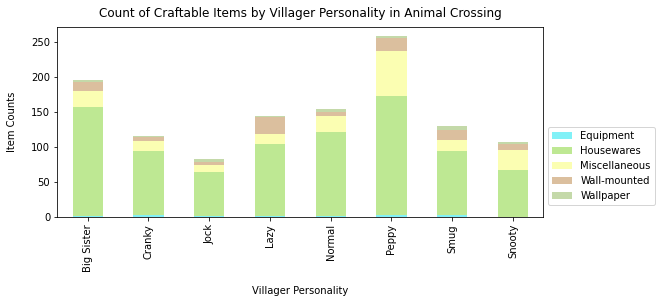

In [80]:
dfnew = dfnew[dfnew.VillagerSource != 'All']
Item_by = dfnew.groupby('VillagerSource')['Category'].value_counts().unstack().fillna(0)
Item_by.plot(kind = 'bar', stacked = True, figsize = (10,4)
             , color = ['#81f1f7','#bee893','#fbfeb2','#dbbf9e','#c4d9a9'])

# df.Species.value_counts().plot(kind = 'bar')
plt.xlabel("Villager Personality", labelpad=14)
plt.ylabel("Item Counts", labelpad=14)
plt.title("Count of Craftable Items by Villager Personality in Animal Crossing", y=1.02)
plt.legend(bbox_to_anchor=(1,0.5))

#Save image file
plt.gcf().subplots_adjust(bottom=0.22, right = 0.8)
plt.savefig('CountofCraftableItems.png', facecolor='w', edgecolor='w')

pass

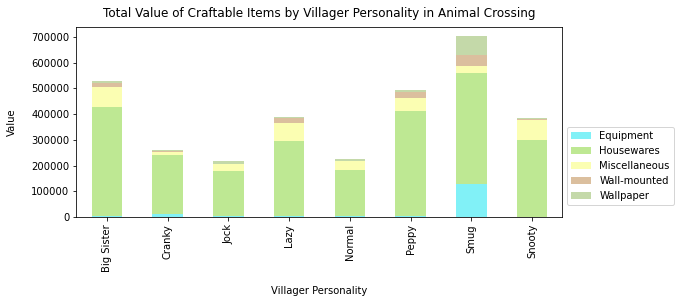

In [96]:
dfnew = dfnew[dfnew.VillagerSource != 'All']
Item_by = dfnew.groupby(['VillagerSource','Category']).Sell_x.sum().unstack().fillna(0)
Item_by.plot(kind = 'bar', stacked = True, figsize = (10,4)
                , color = ['#81f1f7','#bee893','#fbfeb2','#dbbf9e','#c4d9a9'])

# df.Species.value_counts().plot(kind = 'bar')
plt.xlabel("Villager Personality", labelpad=14)
plt.ylabel("Value", labelpad=14)
plt.title("Total Value of Craftable Items by Villager Personality in Animal Crossing", y=1.02)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 0.55))
#Save image file
plt.gcf().subplots_adjust(bottom=0.22, right = 0.8)
plt.savefig('TotalValueofCraftableItems.png', facecolor='w', edgecolor='w')
plt.legend(bbox_to_anchor=(1.0,0.5))
pass

### Seasons & Events

In [123]:
dfev = pd.read_csv('Seasons and Events.csv')
dfev = dfev.loc[:,['Display Name','Type','Year','Dates (Northern Hemisphere)']]
dfev.columns = ['Name','Type','Year','Dates']
dfev.head(5)

,Name,Type,Year,Dates
0,young spring bamboo,Crafting season,Any,February 25 – May 21
1,cherry-blossom petals,Crafting season,Any,April 1 – April 10
2,summer shells,Crafting season,Any,June 1 – August 31
3,acorns and pine cones,Crafting season,Any,September 1 – December 10
4,mushrooms,Crafting season,Any,November 1 – November 30


In [124]:
dfev.Dates = dfev.Dates.str.strip()
dfev[['Start','End']] = dfev.Dates.str.split('–',expand=True)
dfev.Year = dfev.Year.replace('Any','2020')
dfev

,Name,Type,Year,Dates,Start,End
0,young spring bamboo,Crafting season,2020,February 25 – May 21,February 25,May 21
1,cherry-blossom petals,Crafting season,2020,April 1 – April 10,April 1,April 10
2,summer shells,Crafting season,2020,June 1 – August 31,June 1,August 31
3,acorns and pine cones,Crafting season,2020,September 1 – December 10,September 1,December 10
4,mushrooms,Crafting season,2020,November 1 – November 30,November 1,November 30
...,...,...,...,...,...,...
84,Singmogil,Nook Shopping event,2021,April 1 – April 10,April 1,April 10
85,Prom,Nook Shopping event,2021,April 1 – April 30,April 1,April 30
86,Prom,Nook Shopping event,2021,April 1 – April 30,April 1,April 30
87,Prom,Shopping season,2020,April 1 – April 30,April 1,April 30


In [125]:
dfev.Type.value_counts()

Nook Shopping event    39
Special event          18
Zodiac season          12
Crafting season         8
Shopping season         8
Basegame event          4
Name: Type, dtype: int64

In [126]:
#Data pre-process in order to create a Gantt chart
dfev = dfev.drop([25,26,27,30,31,39,41,47,48,51,52,53,55,57,58,59,61,62,63,64,65,66,68,69,71,73,74,76,80,81,86,87])
dfev.at[28,'End']='December 31'
dfev.at[29,'End']='April 4'
dfev.at[46,'End']='October 31'
dfev.at[49,'Start']='November 26'
dfev.at[50,'End']='December 25'
dfev.at[67,'End']='February 15'


In [127]:
dfev.Type.value_counts()

Nook Shopping event    21
Zodiac season          12
Crafting season         8
Special event           8
Shopping season         7
Basegame event          1
Name: Type, dtype: int64

In [131]:
dftest = dfev.loc[dfev['Type'].isin(['Crafting season','Nook Shopping event','Special event'])]
dftest['Name'] = dftest['Name'].str.capitalize()

In [132]:
def to_datetime_(dt):

    dt.Start = pd.to_datetime(dt.Start +', '+ dt.Year)
    dt.End = pd.to_datetime(dt.End +', '+ dt.Year)

to_datetime_(dftest)
print(dftest.info())

dftest.at[6,'End']= pd.to_datetime('2021-02-24')
dftest.at[7,'End']= pd.to_datetime('2021-01-06')
dftest.at[79,'End']= pd.to_datetime('2021-05-31')
dftest = dftest.sort_values('Start')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 88
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    37 non-null     object        
 1   Type    37 non-null     object        
 2   Year    37 non-null     object        
 3   Dates   37 non-null     object        
 4   Start   37 non-null     datetime64[ns]
 5   End     37 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 2.0+ KB
None


Create gantt chart for crafting seasons, nook shopping event and special event

In [56]:
!pip install plotly

In [116]:
import plotly.figure_factory as ff

In [133]:
dftest['Resource'] = dftest.Type
dftest = dftest.loc[:,['Name','Start','End','Resource']]
dftest.columns = ['Task','Start','Finish','Resource']


In [135]:
critical_colors = { 'Crafting season' : '#dbbf9e', 'Nook Shopping event' : '#74e0aa','Special event' : '#fbfeb2' }

fig_plotly = ff.create_gantt(dftest, colors=critical_colors, index_col='Resource', title='Seasons & Events in Animal Crossing',
                             show_colorbar=True, bar_width=0.4, showgrid_x=True, showgrid_y=True, height = 750)
fig_plotly.show()

### Fishing & Insect Data (No Use)

In [63]:
df2 = pd.read_csv('Fish.csv')
df2['Where/How'].value_counts()

Sea                 29
River               27
Pond                12
Pier                 4
River (clifftop)     4
River (mouth)        3
Sea (rainy days)     1
Name: Where/How, dtype: int64

C:\Users\steve\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



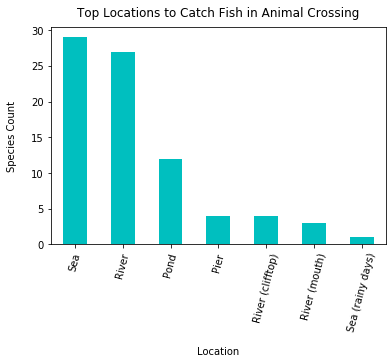

In [64]:
df2['Where/How'].value_counts().plot(kind = 'bar', figsize = (6,4), color = ['C'])

# df.Species.value_counts().plot(kind = 'bar')
plt.xlabel("Location", labelpad=14)
plt.xticks(rotation = 75)
plt.ylabel("Species Count", labelpad=14)
plt.title("Top Locations to Catch Fish in Animal Crossing", y=1.02)

pass

In [66]:
df3 = pd.read_csv('Insects.csv')
df3['Where/How'].value_counts().head(10)

On the ground              10
On trees (any kind)         9
Flying near flowers         9
On palm trees               8
On hardwood/cedar trees     6
Flying near water           5
Flying                      5
On tree stumps              4
On flowers                  4
On rivers/ponds             3
Name: Where/How, dtype: int64

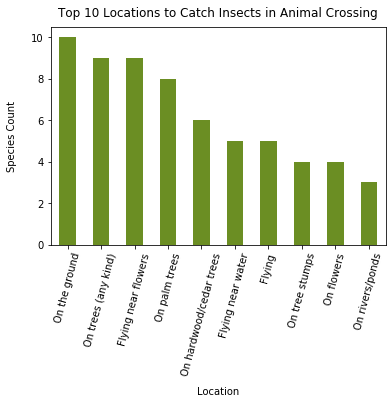

In [67]:
df3['Where/How'].value_counts().head(10).plot(kind = 'bar', figsize = (6,4), color = ['olivedrab'])

# df.Species.value_counts().plot(kind = 'bar')
plt.xlabel("Location", labelpad=10)
plt.xticks(rotation = 75)
plt.ylabel("Species Count", labelpad=14)
plt.title("Top 10 Locations to Catch Insects in Animal Crossing", y=1.02)
pass